<h1><center><b>LGMVIP - Data Science</b></center></h1>
<h2><center><b>Task 10 - ML Facial recognition to detect mood and suggest songs accordingly (Advanced Level)</b></center></h2>
<h3><center><b>Author : Akshay Paunikar</b></center></h3>

In [45]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import os
import random
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.optimizers import Adam
from IPython.display import Audio

In [46]:
# Define path for train and test
train_data = r"E:\LetsGrowMore\Tasks\Task 10 - ML Facial recognition to detect mood and suggest songs accordingly\archive\train"
test_data = r"E:\LetsGrowMore\Tasks\Task 10 - ML Facial recognition to detect mood and suggest songs accordingly\archive\test"

In [47]:
# Create a function to count type of expression in each data
def expression_count(path, set_):
    exp = {}
    for expression in os.listdir(path):
        dir_ = path + "/" + expression
        exp[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(exp, index=[set_])
    return df

In [48]:
train_count = expression_count(train_data, "train")
test_count = expression_count(test_data, "test")
print(train_count)
print(test_count)

       angry  disgust  fear  happy  neutral   sad  surprise
train   3995      436  4097   7215     4965  4830      3171
      angry  disgust  fear  happy  neutral   sad  surprise
test    958      111  1024   1774     1233  1247       831


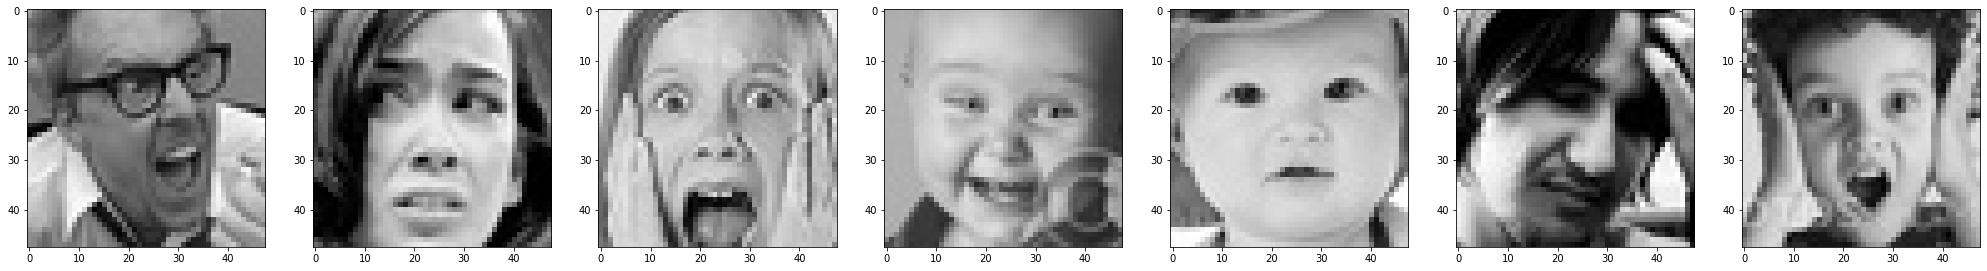

In [49]:
# Set the figure size
plt.figure(figsize=(35,15))

# Angry image
plt.subplot(1,7,1)
angry = cv2.imread(r"E:\LetsGrowMore\Tasks\Task 10 - ML Facial recognition to detect mood and suggest songs accordingly\archive\train\angry\Training_3908.jpg")
plt.imshow(angry)

# Disgust image
plt.subplot(1,7,2)
disgust = cv2.imread(r"E:\LetsGrowMore\Tasks\Task 10 - ML Facial recognition to detect mood and suggest songs accordingly\archive\train\disgust\Training_659019.jpg")
plt.imshow(disgust)

# Fear image
plt.subplot(1,7,3)
fear = cv2.imread(r"E:\LetsGrowMore\Tasks\Task 10 - ML Facial recognition to detect mood and suggest songs accordingly\archive\train\fear\Training_5509390.jpg")
plt.imshow(fear)

# Happy image
plt.subplot(1,7,4)
happy = cv2.imread(r"E:\LetsGrowMore\Tasks\Task 10 - ML Facial recognition to detect mood and suggest songs accordingly\archive\train\happy\Training_109676.jpg")
plt.imshow(happy)

# Neutral image
plt.subplot(1,7,5)
neutral = cv2.imread(r"E:\LetsGrowMore\Tasks\Task 10 - ML Facial recognition to detect mood and suggest songs accordingly\archive\train\neutral\Training_98123.jpg")
plt.imshow(neutral)

# Sad image
plt.subplot(1,7,6)
sad = cv2.imread(r"E:\LetsGrowMore\Tasks\Task 10 - ML Facial recognition to detect mood and suggest songs accordingly\archive\train\sad\Training_696816.jpg")
plt.imshow(sad)

# Surprise image
plt.subplot(1,7,7)
surprise = cv2.imread(r"E:\LetsGrowMore\Tasks\Task 10 - ML Facial recognition to detect mood and suggest songs accordingly\archive\train\surprise\Training_735050.jpg")
plt.imshow(surprise)

# Show all the images
plt.show()

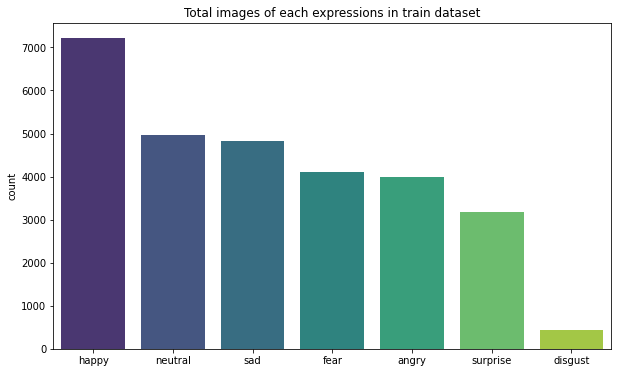

In [50]:
# Let's check count of each type of expression in our train data
diff_exp = {}
for i in os.listdir(train_data):
    directory = train_data +'/'+i
    diff_exp[i] = len(os.listdir(directory))
diff_exp = pd.DataFrame(diff_exp, index=["total"]).transpose().sort_values("total", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=diff_exp.index, y="total", palette="viridis", data=diff_exp)
plt.ylabel("count")
plt.title("Total images of each expressions in train dataset")
plt.show()

In [51]:
# Generate batches of tensor image data with real-time data augmentation.
train_image = ImageDataGenerator(rescale=1/255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')

test_image = ImageDataGenerator(rescale=1/255)

# Generate batches of augmented data.
training_data = train_image.flow_from_directory(directory=train_data,
                                                target_size=(48, 48),
                                                color_mode='grayscale',
                                                batch_size=64,
                                                class_mode='categorical',
                                                shuffle=True)

testing_data = test_image.flow_from_directory(directory=test_data,
                                                target_size=(48, 48),
                                                color_mode='grayscale',
                                                batch_size=64,
                                                class_mode='categorical',
                                                shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


<h4>Create CNN Model :</h4>

In [52]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=7, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001,
                             decay=1e-6),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_4 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_5 (Batc  (None, 24, 24, 128)     

In [14]:
history = model.fit(training_data, epochs=30, validation_data=testing_data, verbose=1, steps_per_epoch=449,
                   validation_steps=112)

Epoch 1/30
449/449 [==============================] - 1035s 2s/step - loss: 1.8741 - accuracy: 0.2310 - val_loss: 2.5676 - val_accuracy: 0.2171
Epoch 2/30
449/449 [==============================] - 637s 1s/step - loss: 1.8026 - accuracy: 0.2457 - val_loss: 1.7683 - val_accuracy: 0.2663
Epoch 3/30
449/449 [==============================] - 639s 1s/step - loss: 1.7856 - accuracy: 0.2586 - val_loss: 1.7774 - val_accuracy: 0.2747
Epoch 4/30
449/449 [==============================] - 642s 1s/step - loss: 1.7698 - accuracy: 0.2649 - val_loss: 1.7167 - val_accuracy: 0.3093
Epoch 5/30
449/449 [==============================] - 635s 1s/step - loss: 1.7608 - accuracy: 0.2747 - val_loss: 1.6680 - val_accuracy: 0.3150
Epoch 6/30
449/449 [==============================] - 638s 1s/step - loss: 1.7331 - accuracy: 0.2908 - val_loss: 1.6093 - val_accuracy: 0.3504
Epoch 7/30
449/449 [==============================] - 669s 1s/step - loss: 1.7138 - accuracy: 0.3052 - val_loss: 1.5720 - val_accuracy: 0.382

In [15]:
model.save("ML_model.h5")

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [54]:
model = load_model('ML_model.h5')

In [55]:
predict = model.evaluate(testing_data)

113/113 [==============================] - 33s 291ms/step - loss: 1.1096 - accuracy: 0.5691


In [56]:
print("Loss :", predict[0])
print("Accuracy :", predict[1])

Loss : 1.1095573902130127
Accuracy : 0.569100022315979


<h4>Now we will test our model with a new image</h4>

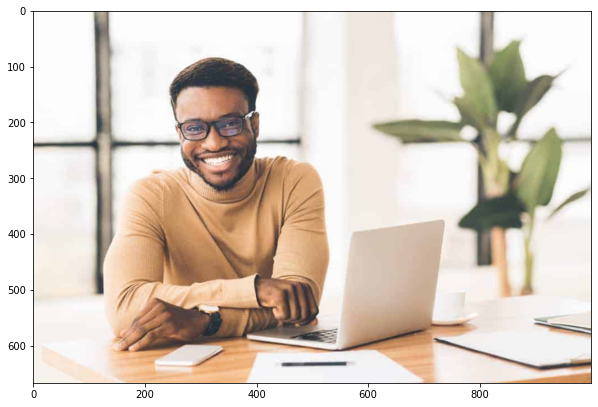

In [64]:
plt.figure(figsize=(10, 8))
new_image = cv2.imread("happy.jpg")
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_RGB2BGR))
plt.show()

In [65]:
# list the emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [66]:
# load image
image = new_image

In [67]:
# Now we will resize the image and turn it to a grayscale and normalize it
resize = cv2.resize(src=image, dsize=(48,48), interpolation=cv2.INTER_BITS2)
gray = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY) / 255.0

In [68]:
# reshape the image
gray = gray.reshape(1, 48, 48, 1)

In [69]:
# predict the output
pred = model.predict(gray)[0]
label = emotions[pred.argmax()]

print("The emotion displayed in the image is :", label)

1/1 [==============================] - 0s 44ms/step
The emotion displayed in the image is : Happy


<h4>Song Recommendation :</h4>

In [70]:
if (label=='Angry'):
    path=r"E:\LetsGrowMore\Tasks\Task 10 - ML Facial recognition to detect mood and suggest songs accordingly\songs\angry"
    files=os.listdir(path)
    song=random.choice(files)
    print("Now Playing:",song)
    audio = Audio(filename=path + '/' + song,autoplay=True)
    display(audio)
    
elif (label=='Disgust'):
    path=r"E:\LetsGrowMore\Tasks\Task 10 - ML Facial recognition to detect mood and suggest songs accordingly\songs\disgust"
    files=os.listdir(path)
    song=random.choice(files)
    print("Now Playing:",song)
    audio = Audio(filename=path + '/' + song,autoplay=True)
    display(audio)

elif (label=='Fear'):
    path=r"E:\LetsGrowMore\Tasks\Task 10 - ML Facial recognition to detect mood and suggest songs accordingly\songs\fear"
    files=os.listdir(path)
    song=random.choice(files)
    print("Now Playing:",song)
    audio = Audio(filename=path + '/' + song,autoplay=True)
    display(audio)
    
elif (label=='Happy'):
    path=r"E:\LetsGrowMore\Tasks\Task 10 - ML Facial recognition to detect mood and suggest songs accordingly\songs\happy"
    files=os.listdir(path)
    song=random.choice(files)
    print("Now Playing:",song)
    audio = Audio(filename=path + '/' + song,autoplay=True)
    display(audio)
    
elif (label=='Sad'):
    path=r"E:\LetsGrowMore\Tasks\Task 10 - ML Facial recognition to detect mood and suggest songs accordingly\songs\sad"
    files=os.listdir(path)
    song=random.choice(files)
    print("Now Playing:",song)
    audio = Audio(filename=path + '/' + song,autoplay=True)
    display(audio)
    
elif (label=='Surprise'):
    path=r"E:\LetsGrowMore\Tasks\Task 10 - ML Facial recognition to detect mood and suggest songs accordingly\songs\surprise"
    files=os.listdir(path)
    song=random.choice(files)
    print("Now Playing:",song)
    audio = Audio(filename=path + '/' + song,autoplay=True)
    display(audio)
    
elif (label=='Neutral'):
    path=r"E:\LetsGrowMore\Tasks\Task 10 - ML Facial recognition to detect mood and suggest songs accordingly\songs\neutral"
    files=os.listdir(path)
    song=random.choice(files)
    print("Now Playing:",song)
    audio = Audio(filename=path + '/' + song,autoplay=True)
    display(audio)

Now Playing: Pharrell_Williams_-_Happy_Video_(getmp3.pro).mp3
